In [1]:
# %%
# Block C1. module
import os
import pathlib
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("done reading external module")

done reading external module


In [2]:
# %%
# Block C2.
# os.chdir('/home/user01/Documents/project/suzuki_analytics/phase_2/notebooks')
strCurrentDirectory = os.getcwd()
print(strCurrentDirectory)

# "notebooks"ディレクトリよりも一階層上にいる場合はNotebooksフォルダに移動
if (strCurrentDirectory[-len("notebooks"):] != "notebooks") and (any("notebooks" in s for s in os.listdir())):
    os.chdir('notebooks')
    strCurrentDirectory = os.getcwd()
    print("notebooksフォルダの一階層上にいたのでnotebooksフォルダに移動しました。")

if strCurrentDirectory[-len("notebooks"):] == "notebooks":
    print("正常。作業ディレクトリがnotebooksフォルダに設定されています。")
else:
    print("エラー。作業ディレクトリがnotebooks以外に設定されています！現在の作業ディレクトリは" + strCurrentDirectory)

/home/user01/Documents/project/suzuki_analytics/phase_2/notebooks
正常。作業ディレクトリがnotebooksフォルダに設定されています。


In [3]:
# %%
# Block C3. 初期状態を読み込み
import subject2initial

PATH_DATA_INT = subject2initial.funIsDirMakeDir(strPath="../data/interim/")
PATH_DATA_PRO = subject2initial.funIsDirMakeDir(strPath="../data/processed/")
PATH_DATA_PRO_SUB2 = subject2initial.funIsDirMakeDir(
    strPath="../data/processed/subject02/")
PATH_DATA_PRO_SUB2_PKL = subject2initial.funIsDirMakeDir(
    strPath="../data/processed/subject02/pickle")

threPacCut = subject2initial.threPacCut
sampFreq = subject2initial.sampFreq
print(subject2initial.strInitialTest)
print("sampFreq = " + str(sampFreq))
print("threPacCut = " + str(threPacCut) )

done reading initial file
done
イニシャルファイルからのテキスト読み込み
sampFreq = 100
threPacCut = 0.95


In [4]:
# %% 
# Block C4. オブジェクトをピクルスで読み込み

lsPdCanThisFeature = subject2initial.pickleReadOne(strObj="lsPdCanThisFeature", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsNpCanResampled = subject2initial.pickleReadOne(strObj="lsNpCanResampled", myPathlib = PATH_DATA_PRO_SUB2_PKL)
timeSeriesStart2End = subject2initial.pickleReadOne(strObj="timeSeriesStart2End", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsNamesFeatureMultiVal = subject2initial.pickleReadOne(strObj="lsNamesFeatureMultiVal", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsTsPacf = subject2initial.pickleReadOne(strObj="lsTsPacf", myPathlib = PATH_DATA_PRO_SUB2_PKL)
pdFeatureProfile = subject2initial.pickleReadOne(strObj="pdFeatureProfile", myPathlib = PATH_DATA_PRO_SUB2_PKL)
pdPacfAcrossFeatures = subject2initial.pickleReadOne(strObj="pdPacfAcrossFeatures", myPathlib = PATH_DATA_PRO_SUB2_PKL)

print(lsPdCanThisFeature[1].head())
print(pdFeatureProfile.head())
print(lsNpCanResampled[1][:10])
print(timeSeriesStart2End[:10])
print(lsNamesFeatureMultiVal[:10])
len(lsTsPacf)
lsTsPacf[0]

lenNamesFeatureMultiVal = len(lsNamesFeatureMultiVal)

print("done")

      timeAdj  value
1    0.000000    4.0
1    0.295909    4.0
138  0.305905    0.0
389  0.315901   12.0
636  0.325898    8.0
  feature      key featureName featureName2  isinThisFile  isMultiValOf104  \
0   0FA21  sc0FA21         NaN      No_Name             1                0   
1   0FA22  sc0FA22         NaN      No_Name             1                0   
2   0FA23  sc0FA23         NaN      No_Name             1                0   
3   0FA25  sc0FA25         NaN      No_Name             1                0   
4   0FA26  sc0FA26         NaN      No_Name             1                0   

   maxAbsPAC  isRemoveDueToPAC  
0        NaN                 0  
1        NaN                 0  
2        NaN                 0  
3        NaN                 0  
4        NaN                 0  
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
['0FA37', '0FA57', '11451', '11467', '11913', '11915', '11927', '11947', '11F47', '11F53']
done


/home/user01/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


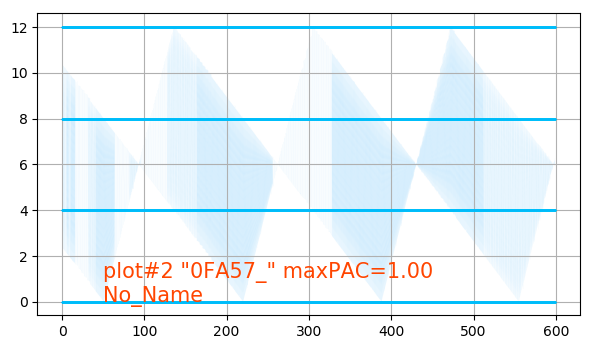

In [5]:
# %%
# Block C5. multiplot PNG

# データ間引き。全要素（6千万要素など）描画するとメモリエラー。
renderingSampFreq = 10
indexTimeRender = [i for i in range(len(timeSeriesStart2End)) if (timeSeriesStart2End[i]*sampFreq)%renderingSampFreq == 0] 



def plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature):
    pltFig = fig.add_subplot(maxCtSubplot, 1, ctSubplot)
    thisFeature = lsNamesFeatureMultiVal[ctFeature]
    outFunINterpolate = lsNpCanResampled[ctFeature]   # 特徴間統一タイムライン

    # 特徴プロファイル入手
    nameProfile = pdFeatureProfile[pdFeatureProfile['feature']
                                   == thisFeature]['featureName2'].iloc[0]

    # 自己相関の結果表示
    valPac = pdPacfAcrossFeatures[pdPacfAcrossFeatures.index ==
                                  thisFeature].iat[0, 0]
    myStr = ("plot#" + str(ctFeature+1) + ' "' + thisFeature + "_" +
             '" maxPAC=' + str("{:.2f}".format(round(min([1, valPac]), 2))) + "\n" +
             nameProfile)
    myTextColor = "black" if valPac <= threPacCut else "orangered"
    pltFig.text(50, outFunINterpolate.min(), myStr,
                size=15, color=myTextColor, zorder=10)

    #　実データを描画
    pdCanThisFeature2 = lsPdCanThisFeature[ctFeature]  # 特徴独自タイムライン
    pltFig.scatter(pdCanThisFeature2['timeAdj'], pdCanThisFeature2['value'],
                   s=0.02, color='deepskyblue', zorder=5)  # , label="test") 'dodgerblue

    # 補間されたミリ秒毎を線画（データ間引き後）
    pltFig.plot(timeSeriesStart2End[indexTimeRender], outFunINterpolate[indexTimeRender],
                color="lightskyblue", linewidth=0.02, zorder=0)
    pltFig.grid()


# プロットを一つ描画してみる。
maxCtSubplot = 1
ctSubplot = 1
ctFeature = 1
fig = plt.figure(figsize=(7, 4), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

In [6]:
# %%
# Block C6. プロットを104個描画
ctFeature = 1
ctPng = 0
myDpi = 100
maxCtSubplot = 10  # 5 # 10


for ctFeature in range(lenNamesFeatureMultiVal):
# for ctFeature in range(maxCtSubplot):
    print(str(ctFeature) + " rendering plot out of " +
            str(lenNamesFeatureMultiVal))
    if ctFeature % maxCtSubplot == 0:
        ctPng = ctPng + 1
        ctSubplot = 0
        fig = plt.figure(figsize=(7, 14), dpi=100)
    ctSubplot = ctSubplot + 1

    # プロット描画
    plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)

    if (ctFeature % maxCtSubplot == (maxCtSubplot-1)) or (ctFeature == (lenNamesFeatureMultiVal - 1)):
        strObj = PATH_DATA_PRO_SUB2/("20190625_" +
                                        "plot_raw_Interpolate2_DPI" + str(myDpi) + "_wPAC_PNG" + str(ctPng) + ".png")
        fig.savefig(strObj, dpi=myDpi, bbox_inches="tight")
        plt.close(fig)    # close the figure

print("done")

0 rendering plot out of 104
1 rendering plot out of 104
2 rendering plot out of 104
3 rendering plot out of 104
4 rendering plot out of 104
5 rendering plot out of 104
6 rendering plot out of 104
7 rendering plot out of 104
8 rendering plot out of 104
9 rendering plot out of 104
10 rendering plot out of 104
11 rendering plot out of 104
12 rendering plot out of 104
13 rendering plot out of 104
14 rendering plot out of 104
15 rendering plot out of 104
16 rendering plot out of 104
17 rendering plot out of 104
18 rendering plot out of 104
19 rendering plot out of 104
20 rendering plot out of 104
21 rendering plot out of 104
22 rendering plot out of 104
23 rendering plot out of 104
24 rendering plot out of 104
25 rendering plot out of 104
26 rendering plot out of 104
27 rendering plot out of 104
28 rendering plot out of 104
29 rendering plot out of 104
30 rendering plot out of 104
31 rendering plot out of 104
32 rendering plot out of 104
33 rendering plot out of 104
34 rendering plot out of

In [7]:
# %%
# Block C7. 偏自己相関が低い特徴に限定（104特徴から87特徴に）
pdFeatureProfile.head()
lsNamesFeatureLowPac = pdFeatureProfile['feature'][
    (pdFeatureProfile['isMultiValOf104'] == 1) &
    (pdFeatureProfile['isRemoveDueToPAC'] != 1)].tolist()

lenNamesFeatureLowPac = len(lsNamesFeatureLowPac)
print(lenNamesFeatureMultiVal)
print(lenNamesFeatureLowPac)

104
87


In [8]:
# %%
# Block C8. 相関行列

vecIndexLowPacOf104 = np.where(
    pd.Series(lsNamesFeatureMultiVal).isin(lsNamesFeatureLowPac) == True)
vecIndexLowPacOf104 = np.array(vecIndexLowPacOf104)[0]
pdCanResampledLowPac = pd.DataFrame(
    lsNpCanResampled[i] for i in vecIndexLowPacOf104).T
pdCanResampledLowPac.columns = lsNamesFeatureLowPac

print(pdCanResampledLowPac.shape)
print(pdCanResampledLowPac.head())

(59900, 87)
   11913  11927  11947  12013  12033  12217  12227     12247  12417   12437  \
0   15.0  -12.3   -7.7    0.0    0.0    0.0    0.0  5.098039  919.0  1260.0   
1   15.0  -12.3   -7.7    0.0    0.0    0.0    0.0  5.098039  919.0  1260.0   
2   15.0  -12.3   -7.7    0.0    0.0    0.0    0.0  5.098039  919.0  1260.0   
3   15.0  -12.3   -7.7    0.0    0.0    0.0    0.0  5.098039  919.0  1260.0   
4   15.0  -12.3   -7.7    0.0    0.0    0.0    0.0  5.098039  919.0  1260.0   

   ...  3D052  3D055  3D064  3D151  3D157  3D177  3D604  3D667     3E801  \
0  ...    0.0    1.0    1.0    1.3    1.0   14.5    0.0    5.0  36.55914   
1  ...    0.0    1.0    1.0    1.3    1.0   14.5    0.0    5.0  36.55914   
2  ...    0.0    1.0    1.0    1.3    1.0   14.5    0.0    5.0  36.55914   
3  ...    0.0    1.0    1.0    1.3    1.0   14.5    0.0    5.0  36.55914   
4  ...    0.0    1.0    1.0    1.3    1.0   14.5    0.0    5.0  36.55914   

    46003  
0  8913.0  
1  8913.0  
2  8913.0  
3  8913.

In [9]:
# %%
# Block C9. rename columns
import copy

pdFeatureProfile2 = copy.deepcopy(pdFeatureProfile)
pdFeatureProfile2['featureNameNoSpace'] = pdFeatureProfile2['featureName2']
pdFeatureProfile2['featureNameNoSpace'] = pdFeatureProfile2['featureNameNoSpace'].replace('No_Name', 'zzz', regex = True)
pdFeatureProfile2['featureNameNoSpace'] = pdFeatureProfile2['featureNameNoSpace'].replace(' ', '_', regex = True)
pdFeatureProfile2['featureNameNoSpace'] = pdFeatureProfile2['featureNameNoSpace'] + "_" + pdFeatureProfile2['feature']

lsNamesFeatureLowPacKeywords = pdFeatureProfile2['featureNameNoSpace'][pdFeatureProfile2['feature'].isin(lsNamesFeatureLowPac) ]
pdCanResampledLowPac.columns = lsNamesFeatureLowPacKeywords
print(pdCanResampledLowPac.head())

featureNameNoSpace  zzz_11913  zzz_11927  Steering_Wheel_Absolute_Angle_11947  \
0                        15.0      -12.3                                 -7.7   
1                        15.0      -12.3                                 -7.7   
2                        15.0      -12.3                                 -7.7   
3                        15.0      -12.3                                 -7.7   
4                        15.0      -12.3                                 -7.7   

featureNameNoSpace  Engine_Torque_Actual_12013  zzz_12033  \
0                                          0.0        0.0   
1                                          0.0        0.0   
2                                          0.0        0.0   
3                                          0.0        0.0   
4                                          0.0        0.0   

featureNameNoSpace  Accelerator_Actual_Position_12217  zzz_12227  zzz_12247  \
0                                                 0.0        0.0   

In [10]:
# %%
# Block C10. sort by column names
pdCanResampledLowPac = pdCanResampledLowPac.reindex(sorted(pdCanResampledLowPac.columns), axis=1)
print(pdCanResampledLowPac.head())

featureNameNoSpace  Acceleration_Sensor_Value_1EF57  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

featureNameNoSpace  Accelerator_Actual_Position_12217  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   

featureNameNoSpace  Brake_Pedal_Switch_Active_31802  \
0                                               1.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0

In [11]:
# %%
# Block C11.
def heatmapTakeCorrMat(dfCorr):
    plt.imshow(dfCorr, interpolation='nearest', cmap=plt.cm.coolwarm)
    plt.colorbar(label='correlation coefficient')
    tick_marks = np.arange(len(dfCorr))

print("defined")

defined


0      Acceleration_Sensor_Value_1EF57
1    Accelerator_Actual_Position_12217
2      Brake_Pedal_Switch_Active_31802
3     Engine_Coolant_Temperature_31017
4                   Engine_Speed_12417
5           Engine_Torque_Actual_12013
6               Fuel_Consumption_31457
7      Fuel_Level_Actual_Percent_3B947
8     Fuel_Level_Percent_Average_3B957
9           Lateral_Sensor_Value_1EF61
Name: featureNameNoSpace, dtype: object


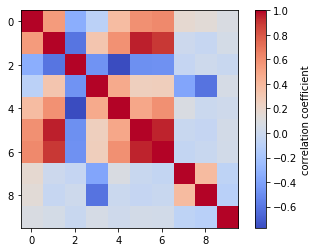

In [12]:
# %%
# Block C12.
# 10 x 10 for a trial
dfCorr10 = pdCanResampledLowPac.iloc[:, 0:10].corr()
heatmapTakeCorrMat(dfCorr10)
dfCorr10.to_csv(PATH_DATA_PRO_SUB2/"dfCorr10.csv")
print(pd.Series(pdCanResampledLowPac.columns).iloc[:10])

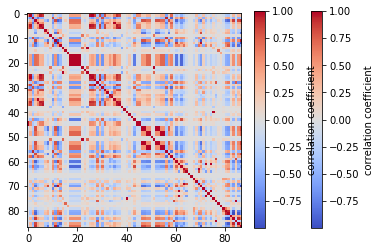

In [13]:
# %%
# Block C13.
# 87 x 87
dfCorr87 = pdCanResampledLowPac.corr()
heatmapTakeCorrMat(dfCorr87, )
dfCorr87.to_csv(PATH_DATA_PRO_SUB2/"dfCorr87.csv")

# %%
# 87 x 87 triangle
# def maskUpperTriangle(dfCorr87):
dfCorrTriUpper87 = dfCorr87.mask(np.triu(np.ones([len(dfCorr87)]*2, dtype=bool)))
heatmapTakeCorrMat(dfCorrTriUpper87)
dfCorrTriUpper87.to_csv(PATH_DATA_PRO_SUB2/"dfCorrTriUpper87.csv")

In [14]:
# %%
# Block C14.
# remove duplicates with r over 0.9 
vecRowMaxCorr87 = dfCorrTriUpper87.max(axis=1)
myThreCorr87 = 0.9
vecRowMaxCorr87LowCorr = vecRowMaxCorr87[vecRowMaxCorr87<myThreCorr87]


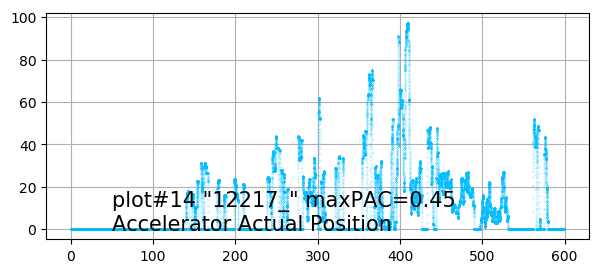

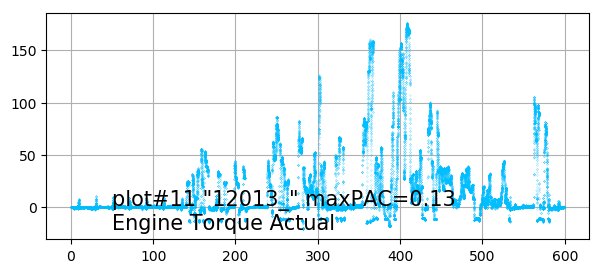

In [15]:
# %%
# Block C15.
# プロットを一つ描画してみる。
maxCtSubplot = 1
ctSubplot = 1
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "12217" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

# %%
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "12013" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

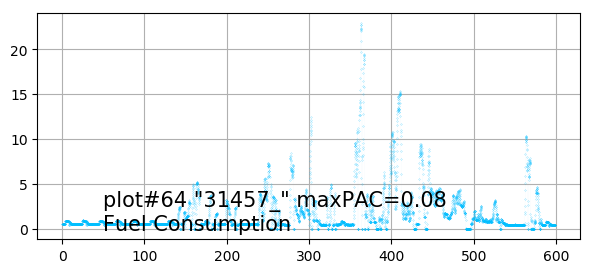

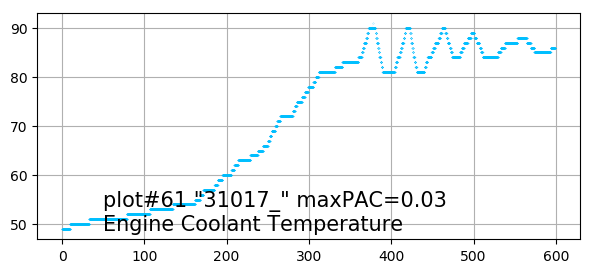

In [16]:
# %%
# Block C16.
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "31457" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

# %%
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "31017" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

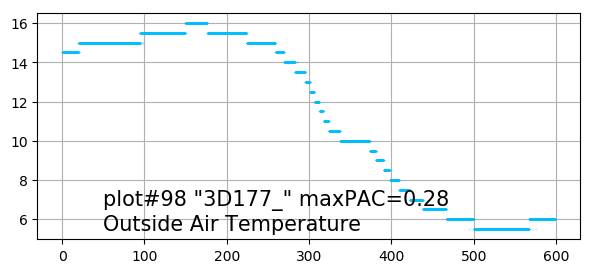

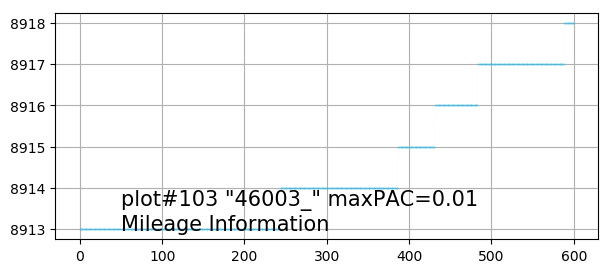

In [17]:
# %%
# Block C17.
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "3D177" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

# %%
indThisFeature = np.where(np.array(lsNamesFeatureMultiVal) == "46003" )[0][0]
ctFeature = indThisFeature
fig = plt.figure(figsize=(7, 3), dpi=100)
plotMyTimeSeries(maxCtSubplot, ctSubplot, ctFeature)
fig.show()

In [18]:
# %%
# Block C18.
# オブジェクトをピクルスで保存

subject2initial.pickleOneObject(nameObj=dfCorr87,   strObj="dfCorr87",  myPathlib = PATH_DATA_PRO_SUB2_PKL)
subject2initial.pickleOneObject(nameObj=vecRowMaxCorr87LowCorr,   strObj="vecRowMaxCorr87LowCorr",  myPathlib = PATH_DATA_PRO_SUB2_PKL)
subject2initial.pickleOneObject(nameObj=lsNamesFeatureLowPac,   strObj="lsNamesFeatureLowPac",  myPathlib = PATH_DATA_PRO_SUB2_PKL)
subject2initial.pickleOneObject(nameObj=dfCorrTriUpper87,   strObj="dfCorrTriUpper87",  myPathlib = PATH_DATA_PRO_SUB2_PKL)

print("done")


# %%



#

done
